In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')
sia= SentimentIntensityAnalyzer()

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

!pip install wordcloud
from wordcloud import WordCloud

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [2]:
my_user = "Abhi0071812"
# my_pass = getpass.getpass()
my_pass = "abhi0708"

search_item = "RCB"

PATH="D:\Drivers\chromedriver.exe"
driver = webdriver.Chrome(PATH)
driver.get("https://twitter.com/i/flow/login")
# driver.maximize_window()
sleep(10)

user_id = driver.find_element(By.XPATH,"//input[@type='text']")
user_id.send_keys(my_user)
user_id.send_keys(Keys.ENTER)

sleep(10)
password = driver.find_element(By.XPATH,"//input[@type='password']")
password.send_keys(my_pass)
password.send_keys(Keys.ENTER)

sleep(10)
search_box = driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.ENTER)

all_tweets = set()

sleep(3)
tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    sleep(3)
    tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets)>50:
        break

C:\Users\AKSHIT\AppData\Local\Temp\ipykernel_19864\1893844227.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


In [3]:
df = pd.DataFrame(all_tweets,columns=['tweets'])
#df.head()
df=df.head(50)
print(df.shape)

#indexing 
id=np.arange(1,51)
df['id']=id
df

(50, 1)


,tweets,id
0,RCB’s desperately needed an in-batter for the ...,1
1,We are Still in the Race #RCB\n\n#RRvsRCB #RCB...,2
2,We won bye 112 run \n#RCBvsRR #IPL2023\n\nRCB ...,3
3,Qualifier 1 - CSK vs GT - GT \nEliminator - MI...,4
4,RCB Win\nCSK lose\nRCB NRR in positive\nRR 59 ...,5
5,Scenes After RCB Won Against RR:,6
6,Anuj Rawat provided a terrific finish to RCB.,7
7,Whole RCB 11 in one frame \n\n#IPL2023 #RCB,8
8,Maxi making the fielders mere spectators! \n\n...,9
9,14th may \n\nRCB humiliated Haarhaar \n59 all ...,10


In [27]:
#%%timeit
#result

res={}
for i,row in tqdm(df.iterrows() , total=len(df)):
  text= row['tweets']
  myid=row['id']
  res[myid]=sia.polarity_scores(text)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

71.6 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
vaders = pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index' : 'id'})
vaders= vaders.merge(df,how='left')
vaders

,id,neg,neu,pos,compound,tweets
0,1,0.194,0.649,0.157,-0.1260,RCB’s desperately needed an in-batter for the ...
1,2,0.000,1.000,0.000,0.0000,We are Still in the Race #RCB\n\n#RRvsRCB #RCB...
2,3,0.142,0.608,0.250,0.3818,We won bye 112 run \n#RCBvsRR #IPL2023\n\nRCB ...
3,4,0.000,0.667,0.333,0.8176,Qualifier 1 - CSK vs GT - GT \nEliminator - MI...
4,5,0.219,0.522,0.259,0.3818,RCB Win\nCSK lose\nRCB NRR in positive\nRR 59 ...
5,6,0.000,0.575,0.425,0.5719,Scenes After RCB Won Against RR:
6,7,0.000,0.659,0.341,0.4767,Anuj Rawat provided a terrific finish to RCB.
7,8,0.000,1.000,0.000,0.0000,Whole RCB 11 in one frame \n\n#IPL2023 #RCB
8,9,0.000,1.000,0.000,0.0000,Maxi making the fielders mere spectators! \n\n...
9,10,0.231,0.769,0.000,-0.3400,14th may \n\nRCB humiliated Haarhaar \n59 all ...


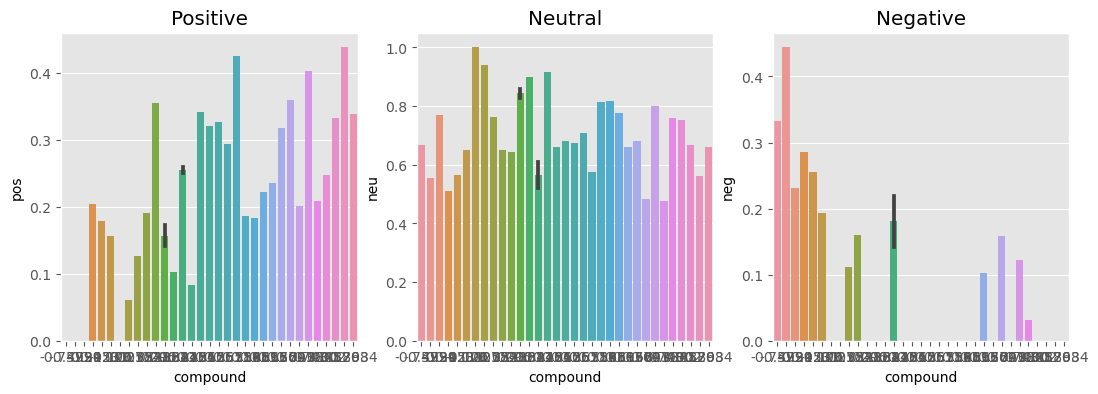

In [6]:
fig,axs = plt.subplots(1,3,figsize=(13,4))
sns.barplot(data=vaders , x= 'compound' , y='pos' , ax=axs[0] )
sns.barplot(data=vaders , x= 'compound' , y='neu' , ax=axs[1] )
sns.barplot(data=vaders , x= 'compound' , y='neg' , ax=axs[2] )
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

In [7]:
stp_words = stopwords.words('english')
#print(stp_words)

def TweetCleaning(tweet):
    cleanTweet = re.sub(r"@[a-zA-Z0-9]+","",tweet)
    cleanTweet = re.sub(r"#[a-zA-Z0-9\s]+","",cleanTweet)
    cleanTweet = ' '.join(word for word in cleanTweet.split() if word not in stp_words)
    return cleanTweet

df['cleanedTweets'] = df['tweets'].apply(TweetCleaning)


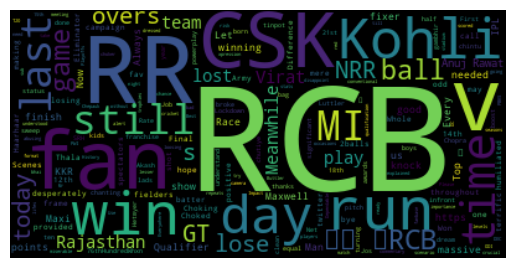

In [8]:
import matplotlib.pyplot as plt

consolidated = ' '.join(word for word in df['cleanedTweets'])

wordCloud = WordCloud(width=400, height=200, random_state=20, max_font_size=119).generate(consolidated)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
def segmentation(tweet):
    if tweet >= 0.05:
        return "positive"
    if tweet <= -0.05:
        return "negative"
    else:
        return "neutral"

In [18]:
vaders['segmentation'] = vaders['compound'].apply(segmentation)
vaders

,id,neg,neu,pos,compound,tweets,segmentation
0,1,0.194,0.649,0.157,-0.1260,RCB’s desperately needed an in-batter for the ...,negative
1,2,0.000,1.000,0.000,0.0000,We are Still in the Race #RCB\n\n#RRvsRCB #RCB...,neutral
2,3,0.142,0.608,0.250,0.3818,We won bye 112 run \n#RCBvsRR #IPL2023\n\nRCB ...,positive
3,4,0.000,0.667,0.333,0.8176,Qualifier 1 - CSK vs GT - GT \nEliminator - MI...,positive
4,5,0.219,0.522,0.259,0.3818,RCB Win\nCSK lose\nRCB NRR in positive\nRR 59 ...,positive
5,6,0.000,0.575,0.425,0.5719,Scenes After RCB Won Against RR:,positive
6,7,0.000,0.659,0.341,0.4767,Anuj Rawat provided a terrific finish to RCB.,positive
7,8,0.000,1.000,0.000,0.0000,Whole RCB 11 in one frame \n\n#IPL2023 #RCB,neutral
8,9,0.000,1.000,0.000,0.0000,Maxi making the fielders mere spectators! \n\n...,neutral
9,10,0.231,0.769,0.000,-0.3400,14th may \n\nRCB humiliated Haarhaar \n59 all ...,negative


<Axes: xlabel='segmentation', ylabel='count'>

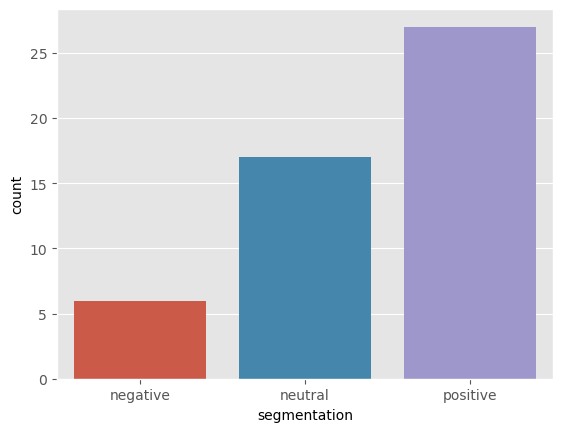

In [19]:
sns.countplot(data=vaders,x='segmentation')

In [20]:
positive = round(len(vaders[vaders.segmentation == 'positive'])/len(vaders)*100,1)
negative = round(len(vaders[vaders.segmentation == 'negative'])/len(vaders)*100,1)
neutral = round(len(vaders[vaders.segmentation == 'neutral'])/len(vaders)*100,1)

responses = [positive, negative, neutral]
responses

response = {'resp': ['Likes', 'Dislike', 'NotSure'], 'pct':[positive, negative, neutral]}
pd.DataFrame(response)

,resp,pct
0,Likes,54.0
1,Dislike,12.0
2,NotSure,34.0


In [ ]:
#ROBERTA

In [14]:
!pip install transformers

In [9]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [10]:
eg = df.iloc[0,2]

In [12]:
#Transfer learning
MODEL='cardiffnlp/twitter-roberta-base-sentiment'
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [14]:
# Roberta Model
encoded_text=tokenizer(eg,return_tensors='pt')
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2],
}
print(scores_dict)

{'roberta_neg': 0.09693833, 'roberta_neu': 0.6989437, 'roberta_pos': 0.20411798}


In [15]:
def polarity_scores_roberta(eg):
  encoded_text=tokenizer(eg,return_tensors='pt')
  output=model(**encoded_text)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2],
    }
  return scores_dict

In [24]:
#%%timeit

res2={}
for i,row in tqdm(df.iterrows() , total=len(df)):
  try:
    text= row['tweets']
    myid=row['id']
    vader_result=sia.polarity_scores(text)
    vader_result_rename={}
    for key ,value in vader_result.items():
      vader_result_rename[f"vader_{key}"]=value
    roberta_result=polarity_scores_roberta(text)
    #combining both the dictionary
    both={**vader_result ,**roberta_result}
    res2[myid]=both
  except RuntimeError :
    print(f'Broke for id {myid}')


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

3min 11s ± 10.4 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
results_df = pd.DataFrame(res2).T
results_df=results_df.reset_index().rename(columns={'index' : 'id'})
results_df= results_df.merge(df,how='left',on='id')
results_df

# vaders = pd.DataFrame(res).T
# vaders=vaders.reset_index().rename(columns={'index' : 'id'})
# vaders= vaders.merge(df,how='left')
# vaders

# id2=np.arange(1,51)
# results_df['id']=id2

# results_df

# merged_df = pd.merge(df, results_df, on='id')
# merged_df

# results_df= results_df.merge(df,how='left')
# results_df.head()

,id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,tweets,cleanedTweets
0,1,0.194,0.649,0.157,-0.1260,0.102527,0.646928,0.250545,RCB’s desperately needed an in-batter for the ...,RCB’s desperately needed in-batter last 3-5 ov...
1,2,0.000,1.000,0.000,0.0000,0.012738,0.677448,0.309814,We are Still in the Race #RCB\n\n#RRvsRCB #RCB...,We Still Race 𓃵
2,3,0.142,0.608,0.250,0.3818,0.029295,0.458714,0.511991,We won bye 112 run \n#RCBvsRR #IPL2023\n\nRCB ...,We bye 112 run
3,4,0.000,0.667,0.333,0.8176,0.045393,0.917617,0.036990,Qualifier 1 - CSK vs GT - GT \nEliminator - MI...,Qualifier 1 - CSK vs GT - GT Eliminator - MI v...
4,5,0.219,0.522,0.259,0.3818,0.039111,0.577963,0.382926,RCB Win\nCSK lose\nRCB NRR in positive\nRR 59 ...,RCB Win CSK lose RCB NRR positive RR 59 All Ou...
5,6,0.000,0.575,0.425,0.5719,0.024411,0.917327,0.058263,Scenes After RCB Won Against RR:,Scenes After RCB Won Against RR:
6,7,0.000,0.659,0.341,0.4767,0.002548,0.097172,0.900280,Anuj Rawat provided a terrific finish to RCB.,Anuj Rawat provided terrific finish RCB.
7,8,0.000,1.000,0.000,0.0000,0.067224,0.870935,0.061841,Whole RCB 11 in one frame \n\n#IPL2023 #RCB,Whole RCB 11 one frame
8,9,0.000,1.000,0.000,0.0000,0.209942,0.714831,0.075227,Maxi making the fielders mere spectators! \n\n...,Maxi making fielders mere spectators! What cal...
9,10,0.231,0.769,0.000,-0.3400,0.079655,0.881498,0.038846,14th may \n\nRCB humiliated Haarhaar \n59 all ...,14th may RCB humiliated Haarhaar 59 https://tw...


In [41]:
results_df['segmentation'] = results_df['compound'].apply(segmentation)
results_df.columns

Index(['id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'tweets', 'cleanedTweets', 'segmentation'],
      dtype='object')

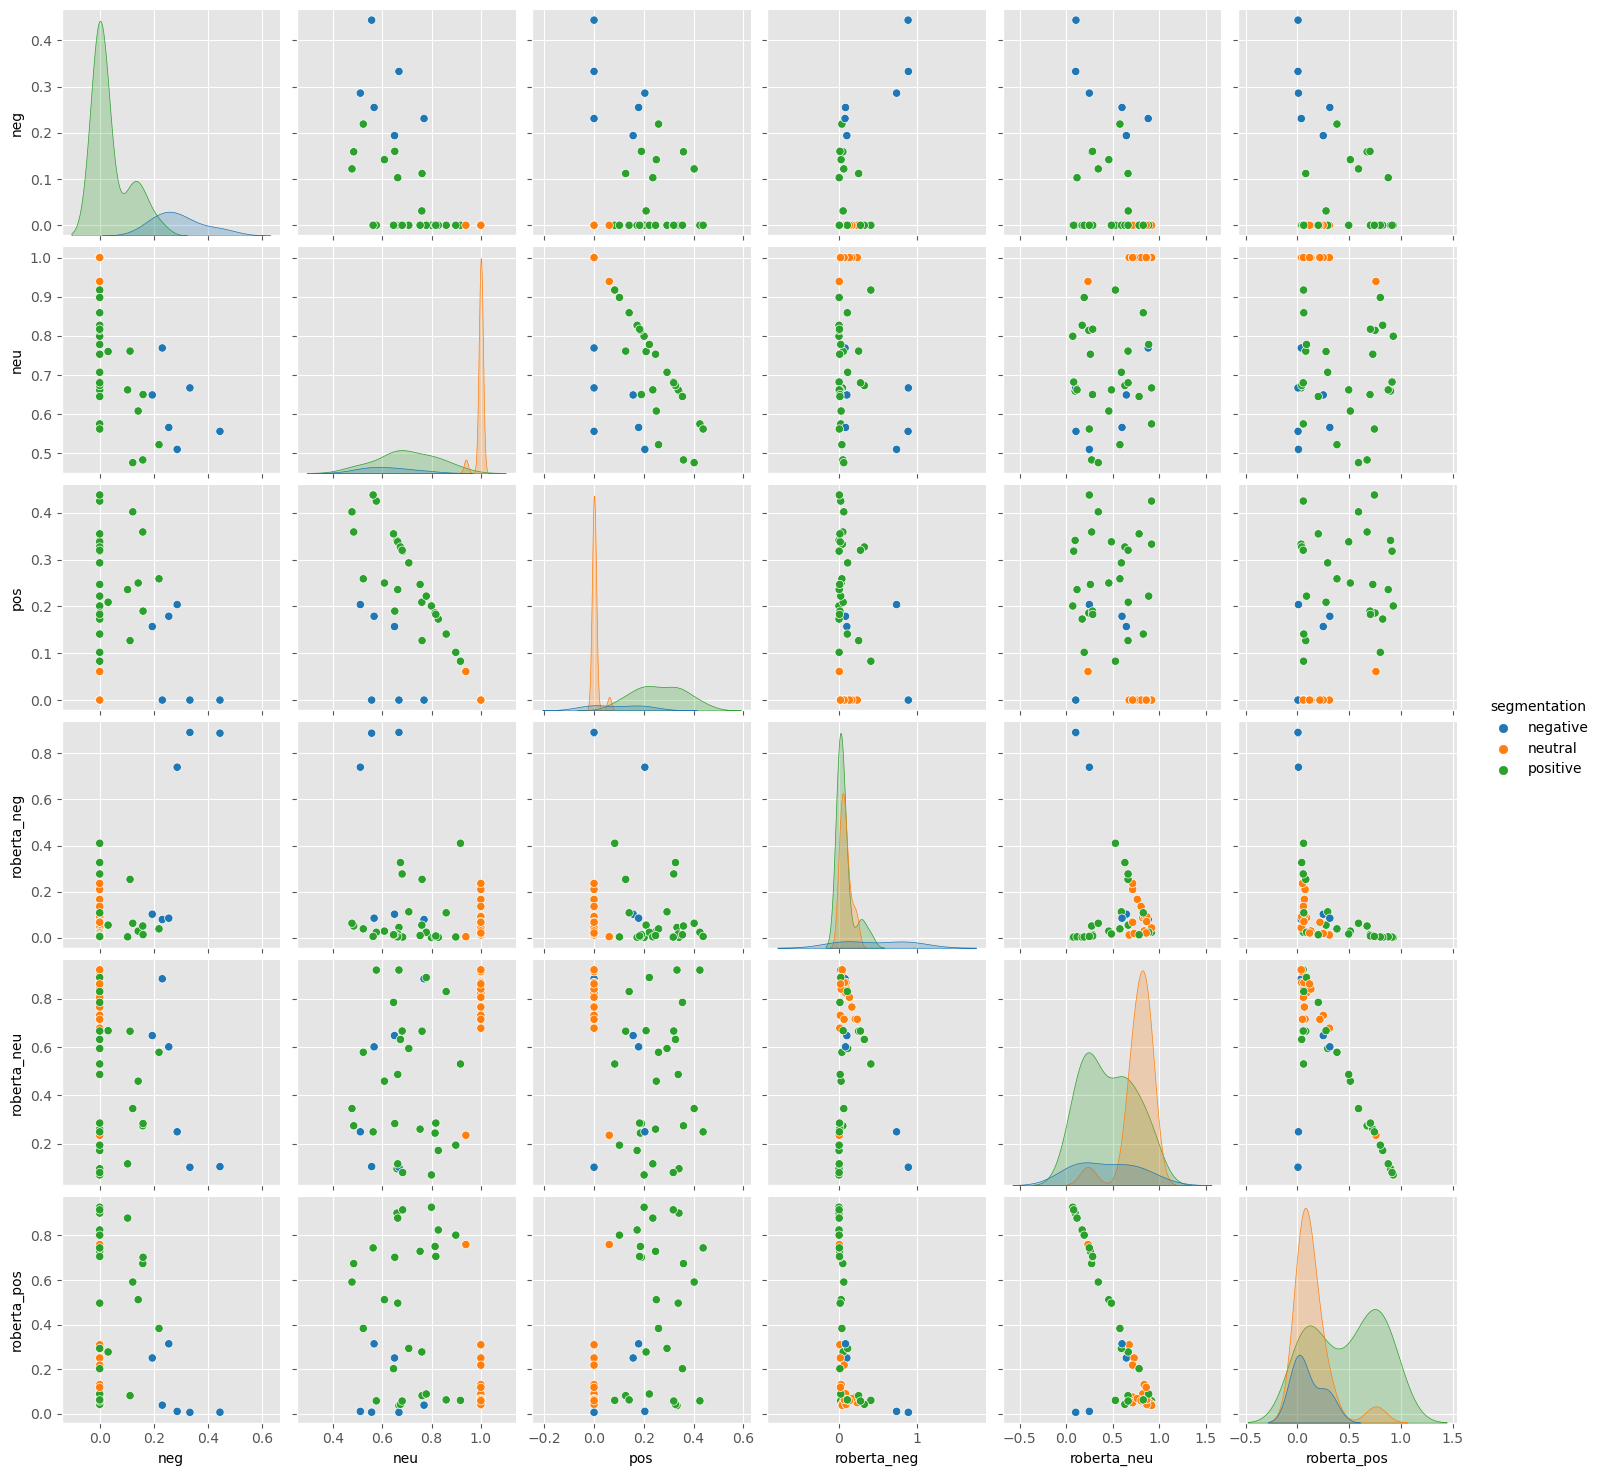

In [42]:
sns.pairplot(data=results_df,
             vars=['neg',           'neu',           'pos',
                'roberta_neg',   'roberta_neu',   'roberta_pos'],
             hue='segmentation',
             palette='tab10'
            )

In [29]:
#results_df['segmentation'] = results_df['compound'].apply(segmentation)
results_df

,id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,tweets,cleanedTweets,segmentation
0,1,0.194,0.649,0.157,-0.1260,0.102527,0.646928,0.250545,RCB’s desperately needed an in-batter for the ...,RCB’s desperately needed in-batter last 3-5 ov...,negative
1,2,0.000,1.000,0.000,0.0000,0.012738,0.677448,0.309814,We are Still in the Race #RCB\n\n#RRvsRCB #RCB...,We Still Race 𓃵,neutral
2,3,0.142,0.608,0.250,0.3818,0.029295,0.458714,0.511991,We won bye 112 run \n#RCBvsRR #IPL2023\n\nRCB ...,We bye 112 run,positive
3,4,0.000,0.667,0.333,0.8176,0.045393,0.917617,0.036990,Qualifier 1 - CSK vs GT - GT \nEliminator - MI...,Qualifier 1 - CSK vs GT - GT Eliminator - MI v...,positive
4,5,0.219,0.522,0.259,0.3818,0.039111,0.577963,0.382926,RCB Win\nCSK lose\nRCB NRR in positive\nRR 59 ...,RCB Win CSK lose RCB NRR positive RR 59 All Ou...,positive
5,6,0.000,0.575,0.425,0.5719,0.024411,0.917327,0.058263,Scenes After RCB Won Against RR:,Scenes After RCB Won Against RR:,positive
6,7,0.000,0.659,0.341,0.4767,0.002548,0.097172,0.900280,Anuj Rawat provided a terrific finish to RCB.,Anuj Rawat provided terrific finish RCB.,positive
7,8,0.000,1.000,0.000,0.0000,0.067224,0.870935,0.061841,Whole RCB 11 in one frame \n\n#IPL2023 #RCB,Whole RCB 11 one frame,neutral
8,9,0.000,1.000,0.000,0.0000,0.209942,0.714831,0.075227,Maxi making the fielders mere spectators! \n\n...,Maxi making fielders mere spectators! What cal...,neutral
9,10,0.231,0.769,0.000,-0.3400,0.079655,0.881498,0.038846,14th may \n\nRCB humiliated Haarhaar \n59 all ...,14th may RCB humiliated Haarhaar 59 https://tw...,negative


In [37]:
#comparison between models
results_df.query("segmentation=='negative'").sort_values('roberta_pos',ascending=False)

,id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,tweets,cleanedTweets,segmentation
40,41,0.255,0.566,0.179,-0.1531,0.085351,0.600588,0.314061,Rohit Duck\nKohli test knock\nCSK Win\nRCB los...,Rohit Duck Kohli test knock CSK Win RCB lose M...,negative
0,1,0.194,0.649,0.157,-0.1260,0.102527,0.646928,0.250545,RCB’s desperately needed an in-batter for the ...,RCB’s desperately needed in-batter last 3-5 ov...,negative
9,10,0.231,0.769,0.000,-0.3400,0.079655,0.881498,0.038846,14th may \n\nRCB humiliated Haarhaar \n59 all ...,14th may RCB humiliated Haarhaar 59 https://tw...,negative
15,16,0.286,0.510,0.204,-0.2023,0.739237,0.249679,0.011084,Hetmyer broke the dream of RCB fans,Hetmyer broke dream RCB fans,negative
23,24,0.444,0.556,0.000,-0.4939,0.886586,0.106083,0.007331,RCB fans & their miserable lifes,RCB fans & miserable lifes,negative
30,31,0.333,0.667,0.000,-0.7579,0.889956,0.103305,0.006738,CSK fans abusing their own players after just ...,CSK fans abusing players 3 bad seasons Meanwhi...,negative


In [38]:
results_df.query("segmentation=='negative'").sort_values('roberta_pos',ascending=False)['tweets'].values[0]

'Rohit Duck\nKohli test knock\nCSK Win\nRCB lose\nMI lose\n\nWhat a day for us '

In [40]:
results_df.query("segmentation=='negative'").sort_values('roberta_pos',ascending=False)['tweets'].values[2]

'14th may \n\nRCB humiliated Haarhaar \n59 all out   https://twitter.com/76thHundredWhxn/status/1650138720836927488…'

In [43]:
eg3 = "I felt energized within five minutes, but it lasted for about 45 minutes. I paid 3.99 dollars for this drink	. I could have just drunk a cup of coffee and saved my money"

In [45]:
sia.polarity_scores(eg3)

{'neg': 0.089, 'neu': 0.744, 'pos': 0.167, 'compound': 0.4118}

In [46]:
encoded_text=tokenizer(eg3,return_tensors='pt')
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2],
}
print(scores_dict)

{'roberta_neg': 0.06505487, 'roberta_neu': 0.33961147, 'roberta_pos': 0.5953337}
